In [2]:
!pip install sklearn

In [32]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import seaborn as sns

In [61]:
data=pd.read_csv("E:\Internship _ML\\65 Years of Weather Data Bangladesh (1948 - 2013)\\65 Years of Weather Data Bangladesh (1948 - 2013).csv")
dataset=pd.DataFrame(data)
#print(dataset.head())
print(len(dataset))

21120


In [62]:
# Dropping Text Data 
dataset = dataset.drop('Station Names',axis=1)

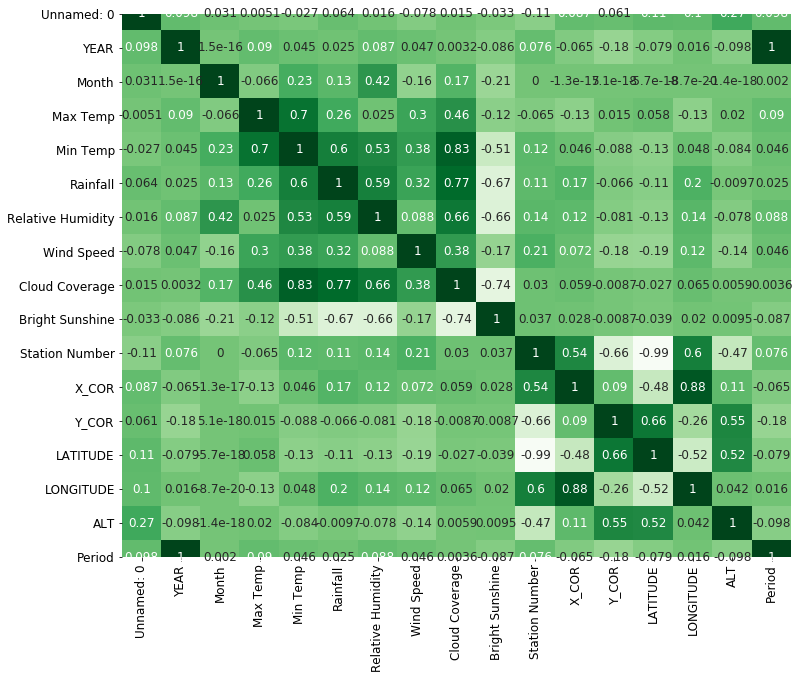

Rainfall           1.000000
Cloud Coverage     0.766821
Bright Sunshine    0.673333
Name: Rainfall, dtype: float64


In [63]:
features = pd.DataFrame(dataset)

plt.figure(figsize=(12,10))
cor = features.corr()
sns.heatmap(cor, annot=True, cbar=False, cmap=plt.cm.Greens)
plt.show()

cor_target = abs(cor["Rainfall"])
relevant_features = cor_target[cor_target>0.6]#.sort_values(ascending=False)

print(relevant_features)

In [64]:
X=dataset.drop('Rainfall',axis=1)
print(newX[0:3]) # check 
Y=dataset['Rainfall']

   Cloud Coverage  Bright Sunshine
0             0.6         7.831915
1             0.8         7.831915
2             0.6         7.831915


In [65]:
newX = pd.DataFrame()
# newX['Min Temp'] = X['Min Temp']
# newX['Relative Humidity'] = X['Relative Humidity']
newX['Cloud Coverage'] = X['Cloud Coverage']
newX['Bright Sunshine'] = X['Bright Sunshine']

print(newX.head())

   Cloud Coverage  Bright Sunshine
0             0.6         7.831915
1             0.8         7.831915
2             0.6         7.831915
3             1.0         7.831915
4             1.6         7.831915


In [68]:
def split_data():
    X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
    print(len(X_train), len(X_train))
    print(len(X_test), len(y_test))

14784 14784
6336 6336


In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
                        # restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
def ridge_regression_train():
    rr = Ridge(alpha=100) #  comparison with alpha value
    rr.fit(X_train, y_train)
    
def ridge_regresson_test():
    Ridge_train_score = rr.score(X_train,y_train)
    Ridge_test_score= rr.score(X_test, y_test)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print ("ridge regression train score high alpha (alpha=100) :", Ridge_train_score)
print ("ridge regression test score high alpha (alpha=100)  :", Ridge_test_score)

In [72]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [73]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [76]:
print ("linear regression train score           :", train_score)
print ("linear regression test score            :", test_score)
print ("ridge regression train score low alpha  :", Ridge_train_score)
print ("ridge regression test score low alpha   :", Ridge_test_score)
print ("ridge regression train score high alpha :", Ridge_train_score100)
print ("ridge regression test score high alpha  :", Ridge_test_score100)

linear regression train score           : 0.6127853296254789
linear regression test score            : 0.6137650481166363
ridge regression train score low alpha  : 0.6127853296254695
ridge regression test score low alpha   : 0.6137650492127033
ridge regression train score high alpha : 0.6127843969874973
ridge regression test score high alpha  : 0.613775004502775


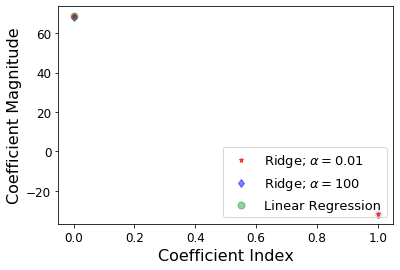

In [77]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()